In [182]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab

Sistema massa-mola:
M x'' = u - k x - f'' x' 

In [183]:
# Massa mola 
f = 0.1
k = 5
M = 20

# Função de transferência
b0 = 1/M
a1 = f/M
a0 = k/M

In [184]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')

ftx = b0 / (s**2 + a1 * s + a0)
ftx1 = s**2/(s**2 + 2*s+1)*ftx
ftx2 = b0/(s**2+2*s+1)
ftx3 = -s/(s**2+2*s+1)*ftx
ftx4 = -1/(s**2+2*s+1)*ftx

ftx

TransferFunction(array([0.05]), array([1.   , 0.005, 0.25 ]))

In [185]:
# Parâmetros de simulação
N = 350
dt = 0.1  # Taxa de amostragem
T = np.arange(0, N + dt, dt)
u = 0.1*np.cos(np.pi*T/7) + 0.05*np.sin(np.pi*T/5) # entrada

len(T)

3501

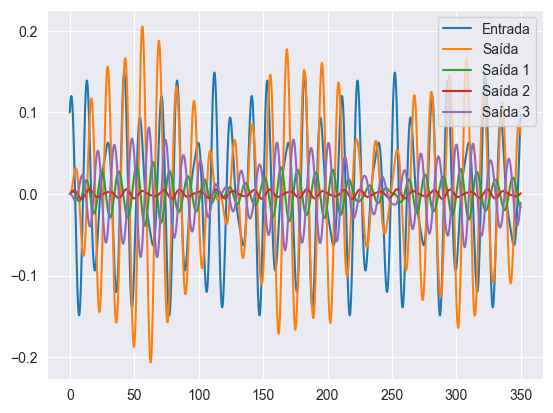

In [186]:
# Simulação dos modelos
Y, T, _  = matlab.lsim(ftx, u, T)
Y1, T, _ = matlab.lsim(ftx1, u, T)
Y2, T, _ = matlab.lsim(ftx2, u, T)
Y3, T, _ = matlab.lsim(ftx3, u, T)
Y4, T, _ = matlab.lsim(ftx4, u, T)

# Plotagem dos resultados juntos
corte = len(T) - 1
plt.plot(T[:corte], u[:corte], label='Entrada')
plt.plot(T[:corte], Y[:corte], label='Saída')
plt.plot(T[:corte], Y1[:corte], label='Saída 1')
plt.plot(T[:corte], Y2[:corte], label='Saída 2')
plt.plot(T[:corte], Y3[:corte], label='Saída 3')
plt.legend()
plt.show()

In [187]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Inicialização de variáveis
theta = np.zeros((2, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
theta[:, 0] = [0, 0]
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros
gama = np.array([[25, 0], [0, 25]])  # Matriz de ajuste

In [188]:
# Loop de iterações para o algoritmo adaptativo

z = list()
print(f'len z: {len(z)}, len Y1: {len(Y1)}, len T: {len(T)}, len theta: {len(theta)}, len erro: {len(erro)}, len phi ')
for k in range(0, int(N/dt)):
    z.append(Y1[k] - Y2[k])
    
    # Construção do vetor phi
    phi = np.array([[Y3[k]], [Y4[k]]])
    
    # Cálculo de ms (fator de ajuste)
    ms = 1 + 0.1 * np.dot(phi.T, phi)[0, 0]
        
    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k] = (z[k] - np.dot(theta[:, k].T, phi[:, k])) / ms**2
    delta_theta = (dt * gama * erro[k] * phi[:, k] / ms**2)

    # Atualização de theta para cada parâmetro separadamente
    theta[0, k+1] = theta[0, k] + delta_theta[0, 0]
    theta[1, k+1] = theta[1, k] + delta_theta[1, 1]


len z: 0, len Y1: 3501, len T: 3501, len theta: 2, len erro: 3501, len phi 


IndexError: index 1 is out of bounds for axis 1 with size 1

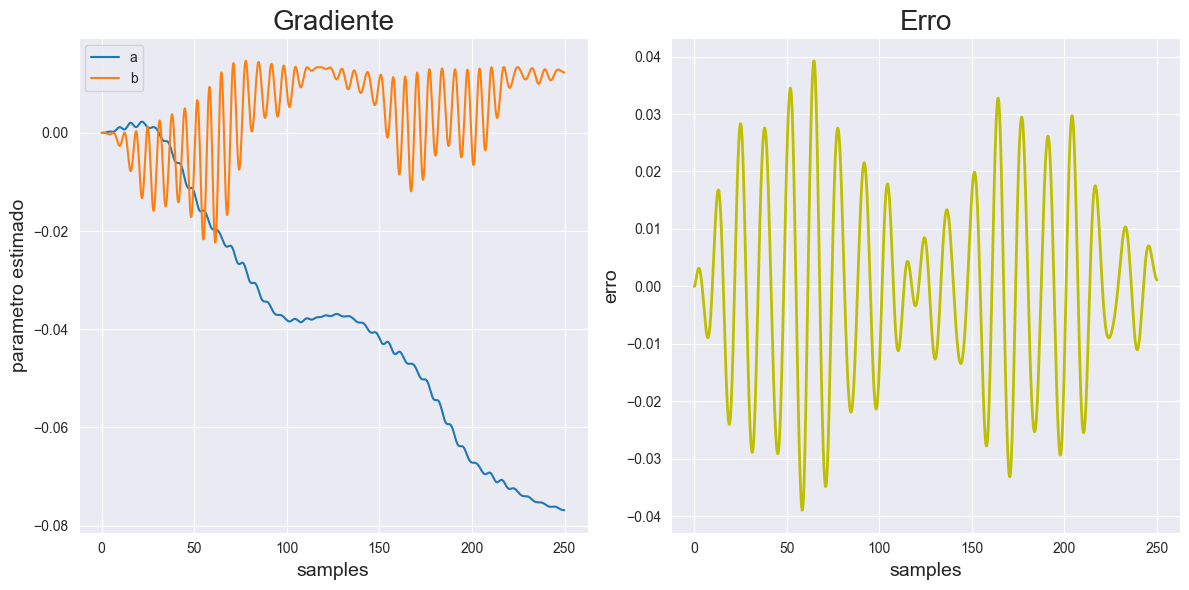

In [ ]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

corte = 2500

fontesize = 14
titlesize = 20
# Primeiro subplot (Gráfico dos parâmetros estimados)
axs[0].plot(T[:corte], theta[0, :][:corte], label='a')
axs[0].plot(T[:corte], theta[1, :][:corte], label='b')
axs[0].legend()
axs[0].set_xlabel('samples', fontsize=fontesize)
axs[0].set_ylabel('parametro estimado', fontsize=fontesize)
axs[0].set_title('Gradiente', fontsize=titlesize)

# Segundo subplot (Gráfico do erro)
axs[1].plot(T[:corte], erro[:corte], 'y', linewidth=2)
axs[1].set_xlabel('samples', fontsize=fontesize)
axs[1].set_ylabel('erro', fontsize=fontesize)
axs[1].set_title('Erro', fontsize=titlesize)
axs[1].grid(True)


# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()